In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
quake_plate_dist = pd.read_csv("MR_Data/quake_plate_dist.csv")
quake_vol_dist = pd.read_csv("MR_Data/quake_vol_dist.csv")

In [3]:
quake_plate_dist2 = quake_plate_dist.drop("geometry", axis = 1)
quake_vol_dist2 = quake_vol_dist.drop("geometry", axis = 1)

ML_df = pd.merge(left = quake_plate_dist2, right = quake_vol_dist2, how = "inner")

In [4]:
ML_df = ML_df.drop(["Unnamed: 0", "Secondary_Effects", "PDE_Shaking_Deaths", "PDE_Deaths", "Utsu_Deaths", "EM-DAT_Deaths", 
                    "Other_Deaths", "Max_Deaths", "Country", "closest_plate", "closest_vol"], axis = 1)
ML_df.columns

Index(['lat', 'lng', 'Depth_km', 'Mag', 'Year', 'Month', 'Day', 'SUB', 'CCB',
       'CRB', 'CTF', 'OCB', 'OSR', 'OTF', 'plates', 'Stratovolcano', 'Caldera',
       'Shield', 'Complex Volcano', 'Submarine', 'Volcanic Field',
       'Cinder Cone', 'Dome', 'Fissure vents', 'Somma Volcano', 'Maar',
       'Pyroclastic Cone', 'Tuff Ring', 'Plug', 'None', 'vol'],
      dtype='object')

In [5]:
cols = ['lat', 'lng', 'Depth_km', 'Mag', 'Year', 'Month', 'Day', 'SUB', 'CCB',
       'CRB', 'CTF', 'OCB', 'OSR', 'OTF', 'plates', 'Stratovolcano', 'Caldera',
       'Shield', 'Complex Volcano', 'Submarine', 'Volcanic Field',
       'Cinder Cone', 'Dome', 'Fissure vents', 'Somma Volcano', 'Maar',
       'Pyroclastic Cone', 'Tuff Ring', 'Plug', 'None', 'vol']
ML_df[cols] = ML_df[cols].apply(pd.to_numeric)#, errors='coerce')

In [6]:
array = ML_df.values

R^2: 0.9854245005251894
Root Mean Squared Error: 7.230391138059341
[ 0.99463045  0.99410876  0.99400935  0.99326998  0.99246183]
Average 5-Fold CV Score: 0.9936960713990809
0.99234134829
0.99374210342


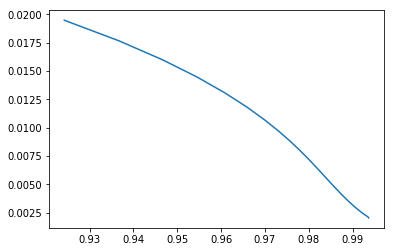

In [7]:
#Train model for lat lng

X = array[:,7:]
y = array[:,:2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
plt.plot(ridge_scores, ridge_scores_std)

R^2: -0.03976133395043498
Root Mean Squared Error: 17.241304226093565
[-14.39320953  -1.24829178  -2.02667363  -6.58897749 -15.66473771]
Average 5-Fold CV Score: -7.984378027165896
-7.58033189727
-9.02418810449


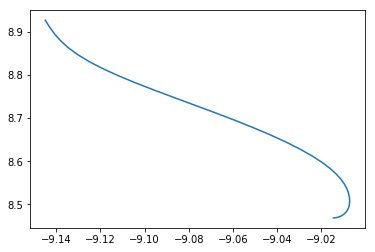

In [8]:
#Train model on Year, Month, Day

X2 = array[:,7:]
y2 = array[:,4:7]

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X2, y2, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

cvscores_3 = cross_val_score(reg, X2, y2, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X2, y2, cv = 10)
print(np.mean(cvscores_10))

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X2, y2, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
plt.plot(ridge_scores, ridge_scores_std)

R^2: 0.11913425908220777
Root Mean Squared Error: 0.910176684817407
[-0.29004436 -0.12664786  0.03372698  0.21848268  0.01128959]
Average 5-Fold CV Score: -0.030638594309609003
-0.126263084926
-0.00329518214403


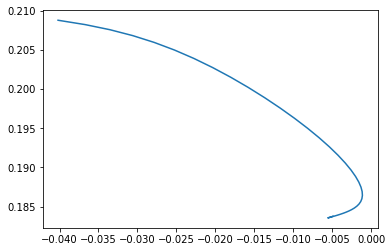

In [9]:
#Train Model on Depth_km

X3 = array[:,7:]
y3 = array[:,3]

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X3, y3, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

cvscores_3 = cross_val_score(reg, X3, y3, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X3, y3, cv = 10)
print(np.mean(cvscores_10))

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X3, y3, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
plt.plot(ridge_scores, ridge_scores_std)

R^2: -0.03740427402889979
Root Mean Squared Error: 28.34835609621497
[ -21.78903881   -2.70126564  -12.63476157  -53.13712506 -156.81311288]
Average 5-Fold CV Score: -49.41506079175715
-24.3332179723
-138.778209214


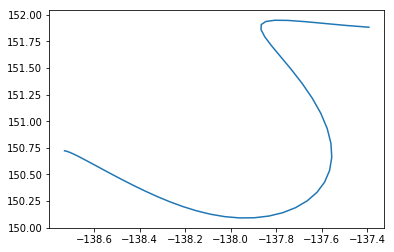

In [10]:
#Train Model on Mag

X4 = array[:,7:]
y4 = array[:,4]

X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X4, y4, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

cvscores_3 = cross_val_score(reg, X4, y4, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X4, y4, cv = 10)
print(np.mean(cvscores_10))

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X4, y4, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
plt.plot(ridge_scores, ridge_scores_std)

Lat Lng is really the only thing that the model works for. But it works really well. I guess that makes sense since the things we were measuring were just based on location. To get better model for other parameters measure other things related to them.

In [11]:
OK_2015 = pd.read_csv("MR_Data/OK_2015.csv")

In [12]:
OK_2015.columns

Index(['id', 'origintime', 'latitude', 'longitude', 'depth', 'err_lon',
       'err_lat', 'err_depth', 'err_origintime', 'county', 'origin_src',
       'prefmag', 'pmag_type', 'pmag_src', 'mw', 'mw_src', 'mblg_ogs',
       'mblg_usgs', 'ml_ogs', 'm3hz_ogs', 'md_ogs', 'mb', 'ms', 'mfa',
       'max_mmi', 'reafile', 'reamtime', 'geom', 'pdlid', 'mw_ogs'],
      dtype='object')

In [13]:
OK_2015_lat_lng = OK_2015.drop(['id', 'origintime', 'depth', 'err_lon',
       'err_lat', 'err_depth', 'err_origintime', 'county', 'origin_src',
       'prefmag', 'pmag_type', 'pmag_src', 'mw', 'mw_src', 'mblg_ogs',
       'mblg_usgs', 'ml_ogs', 'm3hz_ogs', 'md_ogs', 'mb', 'ms', 'mfa',
       'max_mmi', 'reafile', 'reamtime', 'geom', 'pdlid', 'mw_ogs'], axis = 1)

OK_2015_lat_lng.columns

Index(['latitude', 'longitude'], dtype='object')

In [14]:
geometry = [Point(xy) for xy in zip(OK_2015_lat_lng.longitude, OK_2015_lat_lng.latitude)]
crs = {"init": "epsg:4326"} 
OK_2015_gdf = gpd.GeoDataFrame(OK_2015_lat_lng, crs=crs, geometry=geometry)

boundaries_gdf = gpd.read_file("MR_Data/PB2002_steps.json")

earthquakes_geo = OK_2015_gdf.geometry

boundaries_geo = boundaries_gdf.geometry
sub_geo = boundaries_gdf[boundaries_gdf["STEPCLASS"].str.contains("SUB")].geometry
ccb_geo = boundaries_gdf[boundaries_gdf["STEPCLASS"].str.contains("CCB")].geometry
crb_geo = boundaries_gdf[boundaries_gdf["STEPCLASS"].str.contains("CRB")].geometry
ctf_geo = boundaries_gdf[boundaries_gdf["STEPCLASS"].str.contains("CTF")].geometry
ocb_geo = boundaries_gdf[boundaries_gdf["STEPCLASS"].str.contains("OCB")].geometry
osr_geo = boundaries_gdf[boundaries_gdf["STEPCLASS"].str.contains("OSR")].geometry
otf_geo = boundaries_gdf[boundaries_gdf["STEPCLASS"].str.contains("OTF")].geometry

def quake_dist(geoseries):
    dist_list = []
    for quake in earthquakes_geo:
        dist = np.min([quake.distance(vol) for vol in geoseries])
        dist_list.append(dist)
    return dist_list

boundary_list = [boundaries_geo, sub_geo, ccb_geo, crb_geo, ctf_geo, ocb_geo, osr_geo, otf_geo]

total_bound_dist = []

for geoseries in boundary_list:
    min_distances = quake_dist(geoseries)
    total_bound_dist.append(min_distances)
    
total_bound_dist

boundary_distances = pd.DataFrame(total_bound_dist)
boundary_distances = boundary_distances.transpose()
boundary_distances.columns = ["boundaries_geo", "sub_geo", "ccb_geo", "crb_geo", "ctf_geo", "ocb_geo", 
                              "osr_geo", "otf_geo"]
earthquakes_dist = pd.concat([OK_2015_gdf, boundary_distances], axis=1)

earthquakes_dist.to_file(filename = "MR_Data/OK_2015_bound_dist.GeoJSON", driver = "GeoJSON")

volcanoes = pd.read_csv("MR_Data/volcanoes_scraped.csv")
volcanoes = volcanoes.drop(["Unnamed: 0", "geometry"], axis = 1)

geometry = [Point(xy) for xy in zip(volcanoes.lng, volcanoes.lat)]
crs = {"init": "epsg:4326"} 
volcanoes_gdf = gpd.GeoDataFrame(volcanoes, crs=crs, geometry=geometry)

volcanoes_gdf = volcanoes_gdf.drop([86, 96, 263, 276])
volcanoes_gdf = volcanoes_gdf.drop(volcanoes_gdf[volcanoes_gdf["Type"].isnull()].index)

vol_geo = volcanoes_gdf.geometry
strato_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Stratovolcano")].geometry
caldera_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Caldera")].geometry
shield_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Shield")].geometry
complex_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Complex Volcano")].geometry
submarine_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Submarine")].geometry
vol_field_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Volcanic Field")].geometry
cinder_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Cinder Cone")].geometry
dome_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Dome")].geometry
fissure_vents_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Fissure vents")].geometry
somma_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Somma Volcano")].geometry
maar_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Maar")].geometry
proclastic_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Pyroclastic Cone")].geometry
flood_basalt_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Flood Basalt")].geometry
tuff_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Tuff Ring")].geometry
plug_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("Plug")].geometry
noname_vol = volcanoes_gdf[volcanoes_gdf["Type"].str.contains("")].geometry

vol_type_list = [vol_geo, strato_vol, caldera_vol, shield_vol, complex_vol, submarine_vol, vol_field_vol, 
                 cinder_vol, dome_vol, fissure_vents_vol, somma_vol, maar_vol, proclastic_vol, tuff_vol, 
                 plug_vol]

total_vol_dist = []

for geoseries in vol_type_list:
    dist_list = quake_dist(geoseries)
    total_vol_dist.append(dist_list)
    
total_vol_dist

vol_dist = pd.DataFrame(total_vol_dist)
vol_dist = vol_dist.transpose()
vol_dist.columns = ["vol", "strato", "caldera", "shield", "complex", "submarine", "vol_field", "cinder", 
                 "dome", "fissure_vents", "somma", "maar", "proclastic", "tuff", 
                 "plug"]
quake_vol_dist = pd.concat([OK_2015_gdf, vol_dist], axis=1)

quake_vol_dist.to_file(filename = "MR_Data/OK_2015_vol_dist.GeoJSON", driver = "GeoJSON")

In [15]:
OK_2015_bound = gpd.read_file("MR_Data/OK_2015_bound_dist.GeoJSON")
OK_2015_bound = OK_2015_bound.drop("geometry", axis=1)
OK_2015_bound.head()

,latitude,longitude,boundaries_geo,sub_geo,ccb_geo,crb_geo,ctf_geo,ocb_geo,osr_geo,otf_geo
0,36.36558,-97.07604,16.699619,17.564141,19.721321,17.763003,17.329627,17.564141,16.699619,16.699619
1,36.65549,-97.63704,16.469975,17.502359,19.201649,17.312037,16.981989,17.502359,16.469975,16.469975
2,36.67116,-97.61475,16.497004,17.527447,19.225869,17.338056,17.009134,17.527447,16.497004,16.497004
3,36.88717,-97.68763,16.589986,17.673044,19.184520,17.336404,17.056117,17.673044,16.589986,16.589986
4,36.93193,-97.49207,16.763708,17.813665,19.384562,17.536036,17.247005,17.813665,16.763708,16.763708


In [16]:
OK_2015_vol = gpd.read_file("MR_Data/OK_2015_vol_dist.GeoJSON")
OK_2015_vol = OK_2015_vol.drop("geometry", axis=1)
OK_2015_vol.head()

,latitude,longitude,vol,strato,caldera,shield,complex,submarine,vol_field,cinder,dome,fissure_vents,somma,maar,proclastic,tuff,plug
0,36.36558,-97.07604,7.014464,17.256596,15.806030,25.247583,22.566722,34.290644,9.313559,7.014464,60.864697,82.652354,111.594977,20.384464,101.161535,16.592949,11.221870
1,36.65549,-97.63704,6.456227,17.504247,15.175672,24.627936,22.997642,33.671191,8.869837,6.456227,60.235773,83.087588,112.144392,19.816310,101.719913,15.961588,10.630173
2,36.67116,-97.61475,6.479022,17.521182,15.186807,24.644804,23.006450,33.688296,8.896078,6.479022,60.250517,83.061418,112.121536,19.838314,101.697507,15.974692,10.633306
3,36.88717,-97.68763,6.417274,17.732763,15.014532,24.513893,23.234220,33.559263,8.902446,6.417274,60.101906,83.060556,112.186586,19.762813,101.769025,15.815030,10.424059
4,36.93193,-97.49207,6.615504,17.789006,15.161756,24.689419,23.223368,33.735606,9.101112,6.615504,60.266654,82.861001,111.989584,19.958121,101.573243,15.972719,10.523948


In [17]:
ML_df_OK = pd.merge(left = OK_2015_bound, right = OK_2015_vol, how = "inner")

In [18]:
ML_df_OK.head()

,latitude,longitude,boundaries_geo,sub_geo,ccb_geo,crb_geo,ctf_geo,ocb_geo,osr_geo,otf_geo,...,submarine,vol_field,cinder,dome,fissure_vents,somma,maar,proclastic,tuff,plug
0,36.36558,-97.07604,16.699619,17.564141,19.721321,17.763003,17.329627,17.564141,16.699619,16.699619,...,34.290644,9.313559,7.014464,60.864697,82.652354,111.594977,20.384464,101.161535,16.592949,11.221870
1,36.65549,-97.63704,16.469975,17.502359,19.201649,17.312037,16.981989,17.502359,16.469975,16.469975,...,33.671191,8.869837,6.456227,60.235773,83.087588,112.144392,19.816310,101.719913,15.961588,10.630173
2,36.67116,-97.61475,16.497004,17.527447,19.225869,17.338056,17.009134,17.527447,16.497004,16.497004,...,33.688296,8.896078,6.479022,60.250517,83.061418,112.121536,19.838314,101.697507,15.974692,10.633306
3,36.88717,-97.68763,16.589986,17.673044,19.184520,17.336404,17.056117,17.673044,16.589986,16.589986,...,33.559263,8.902446,6.417274,60.101906,83.060556,112.186586,19.762813,101.769025,15.815030,10.424059
4,36.93193,-97.49207,16.763708,17.813665,19.384562,17.536036,17.247005,17.813665,16.763708,16.763708,...,33.735606,9.101112,6.615504,60.266654,82.861001,111.989584,19.958121,101.573243,15.972719,10.523948


In [19]:
array_train = ML_df.values
array_test = ML_df_OK.values

X = array_train[:,3:]
y = array_train[:,1:3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(array_test[:,2:])

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(array_test[:,2:], array_test[:,:2])))
rmse = np.sqrt(mean_squared_error(array_test[:,:2], y_pred))
print("Root Mean Squared Error: {}".format(rmse))

reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
plt.plot(ridge_scores, ridge_scores_std)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').